## Proteccion - Quantum Computing
# Optimizaci√≥n de Portfolio

## Introduccion: Que es optimizaci√≥n de Portfolio?
Optimizaci√≥n de portfolio es un proceso crucial para cualquier persona que desee maximizar la rentabilidad de sus inversiones.
Las inversiones suelen ser un set de los activos (acciones, cr√©ditos, bonos, derivados, opciones de compra, venta, etc.) y esta colecci√≥n de activos se denomina **Portfolio**.
<center><img src="../src/ex1-01.png" width="270"></center>
El objetivo de la optimizaci√≥n de portfolio es minimizar los riesgos (p√©rdida financiera) y maximizar los rendimientos (ganancia financiera). Pero este proceso no es tan sencillo como puede parecer. Obtener altos rendimientos con poco riesgo es, de hecho, demasiado bueno para ser verdad. Los riesgos y los rendimientos suelen tener una relaci√≥n de compensaci√≥n que hace que la optimizaci√≥n de su cartera sea un poco m√°s complicada. Como afirma el Dr. Harry Markowitz en su Modern Portfolio Theory que cre√≥ en 1952, "el riesgo es una parte inherente de una mayor recompensa".

## Encontrar la frontera eficiente
La teor√≠a moderna de portfolio (MPT) sirve como marco general para determinar una cartera ideal para los inversores. La MPT tambi√©n se conoce como teor√≠a de la cartera de media-varianza porque supone que cualquier inversor elegir√° la cartera √≥ptima del conjunto de carteras que:
- Maximiza el rendimiento esperado para un nivel de riesgo dado; y
- Minimiza los riesgos para un determinado nivel de rentabilidad esperada.

La siguiente figura muestra la frontera de varianza m√≠nima de la teor√≠a de cartera moderna, donde el eje horizontal muestra el riesgo y el eje vertical muestra el rendimiento esperado.

<center><img src="src/ex1-02.png" width="400" height="400"/></center>

Los inversores nunca querr√°n tener una cartera por debajo del punto m√≠nimo de varianza. Siempre obtendr√°n rendimientos m√°s altos a lo largo de la parte con pendiente positiva de la frontera de varianza m√≠nima. Y la parte con pendiente positiva de la frontera de varianza m√≠nima se denomina **frontera eficiente**.

La **frontera eficiente** es donde se encuentran las carteras √≥ptimas. Y ayuda a reducir las diferentes carteras entre las que puede elegir el inversor.

## ¬øC√≥mo podemos formular este problema?<br>
La funci√≥n que describe la frontera eficiente se puede formular en un programa cuadr√°tico con restricciones lineales como se muestra a continuaci√≥n. <br>
Los t√©rminos que est√°n marcados en rojo est√°n asociados a riesgos y los t√©rminos en azul est√°n asociados a rendimientos.
Puede ver que nuestro objetivo es minimizar la compensaci√≥n entre riesgo y rendimiento. En general, la funci√≥n que queremos optimizar se llama funci√≥n objetivo. <br> <br>

<div align="center"> <font size=5em >$\min_{x \in \{0, 1\}^n}: $</font> <font color='red', size=5em >$q x^n\Sigma x$</font> - <font color='blue', size=5em>$\mu^n x$</font> </div>

<div align="center"> <font size=5em >$sujeto$</font> <font size=5em >$a: 1^n x = B$</font> </div>

- <font size=4em >$x$</font> indica asignaci√≥n de activos.
- <font size=4em >$Œ£$</font> (sigma) es una matriz de covarianza.
Una matriz de covarianza es un concepto matem√°tico √∫til que se aplica ampliamente en el mundo financiero. Es una medida estad√≠stica de c√≥mo var√≠an los precios de dos activos entre s√≠. Cuando la covarianza entre dos acciones es alta, significa que una acci√≥n experimenta fuertes movimientos de precios y es vol√°til si cambia el precio de la otra acci√≥n.
- <font size=4em >$q$</font> se denomina factor de riesgo (tolerancia al riesgo), que es una evaluaci√≥n de la voluntad o la capacidad de una persona para asumir riesgos. Por ejemplo, cuando utilizas los servicios de asesoramiento financiero automatizado, los llamados robo-advising, normalmente ver√°s diferentes niveles de tolerancia al riesgo. Valor entre 0 y 1.
- <font size=4em >$ùùÅ$</font> (mu) es el rendimiento esperado y lo que queremos maximizar.
- <font size=4em >$n$</font> es la cantidad de activos diferentes entre los que podemos elegir
- <font size=4em >$B$</font> Presupuesto,en este contexto significa la cantidad de activos que podemos asignar en nuestra cartera.


## Qiskit Finance
<center><img src="src/qiskit.png" width="900" height="900"/></center>

In [49]:
from qiskit import Aer
from qiskit.algorithms import VQE, QAOA, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import *
from qiskit.circuit.library import TwoLocal,EfficientSU2
from qiskit.utils import QuantumInstance,algorithm_globals
from qiskit_finance import QiskitFinanceError
from qiskit_finance.applications.optimization import PortfolioOptimization
from qiskit_optimization.algorithms import MinimumEigenOptimizer ,CplexOptimizer
from qiskit_optimization.applications import OptimizationApplication
from qiskit_optimization.converters import QuadraticProgramToQubo

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import date, timedelta, datetime
import warnings
import mplfinance as mpl

## Descarga de datos en Binance
Para nuestra demo utilizaremos datos de criptomonedas,que descargaremos utilizando la API de Binance.
<center><img src="src/binance.png" width="300" height="300"/></center>
Las criptomomendas utilizadas en esta demo:

- Bitcoin
- Ethereum
- BNB
- Solana
- Cardano
- XRP
- Polkdadot
- Doge

Descargaremos los datos de los ultimos 356 d√≠as y tomaremos el valor de cierre por d√≠a.

In [5]:
#Client API configuration
from dotenv import load_dotenv
load_dotenv()
import os
API_KEY = os.getenv("API_KEY")
API_SECRET = os.getenv("API_SECRET")

In [6]:
from binance.client import Client

In [7]:
client = Client(API_KEY,API_SECRET)

In [10]:
info = pd.DataFrame(client.get_all_tickers())

In [11]:
##Get all the cryptocurrencies with USDT conversion.

assets = ['BNBUSDT','BTCUSDT','ETHUSDT','SOLUSDT','ADAUSDT','XRPUSDT','DOTUSDT','DOGEUSDT']
#assets = [symbol for symbol in info['symbol'] if 'USDT' in symbol]


#start="2020.10.23"
days = 365
#end = (datetime.today()-timedelta(days=1)).strftime("%Y.%m.%d")
start = (datetime.today()-timedelta(days=days)).strftime("%Y.%m.%d")
end = (datetime.today()).strftime("%Y.%m.%d")
timeframe="1d"

In [12]:
#Filter only CC with 366 days

df = pd.DataFrame()
for asset in assets:
    df_aux= pd.DataFrame(client.get_historical_klines(asset, timeframe,start,end))
    if len(df_aux) == (days+1):
        df_aux=df_aux.iloc[:,:6]
        df_aux.columns=["Date","Open","High","Low","Close","Volume"]
        df_aux.insert(1, "asset", asset, allow_duplicates=False)
        df = df.append(df_aux)

df['Date']=pd.to_datetime(df['Date'],unit="ms")
df.set_index('Date',inplace = True)
df.iloc[:,1:6]=df.iloc[:,1:6].astype("float")
assets = df['asset'].unique()

In [13]:
df

asset      Open      High       Low     Close        Volume
Date                                                                      
2021-03-06   BNBUSDT  225.5391  232.4996  219.1514  226.3814  2.663376e+06
2021-03-07   BNBUSDT  226.3812  243.9500  224.9542  240.1100  3.519963e+06
2021-03-08   BNBUSDT  240.1039  243.0986  228.7029  240.5509  3.045992e+06
2021-03-09   BNBUSDT  240.7852  297.2962  235.6001  293.2052  7.937299e+06
2021-03-10   BNBUSDT  293.1305  295.5000  263.8184  278.4499  6.012304e+06
...              ...       ...       ...       ...       ...           ...
2022-03-02  DOGEUSDT    0.1340    0.1373    0.1306    0.1330  6.725115e+08
2022-03-03  DOGEUSDT    0.1330    0.1339    0.1271    0.1297  5.234962e+08
2022-03-04  DOGEUSDT    0.1297    0.1302    0.1200    0.1226  6.603100e+08
2022-03-05  DOGEUSDT    0.1226    0.1256    0.1209    0.1250  3.239247e+08
2022-03-06  DOGEUSDT    0.1249    0.1256    0.1214    0.1231  2.060146e+08

[2928 rows x 6 columns]

In [9]:
assets

array(['BNBUSDT', 'BTCUSDT', 'ETHUSDT', 'SOLUSDT', 'ADAUSDT', 'XRPUSDT',
       'DOTUSDT', 'DOGEUSDT'], dtype=object)

In [19]:
print(f"Cantidad de criptomonedas:{len(assets)}")

Cantidad de criptomonedas:8


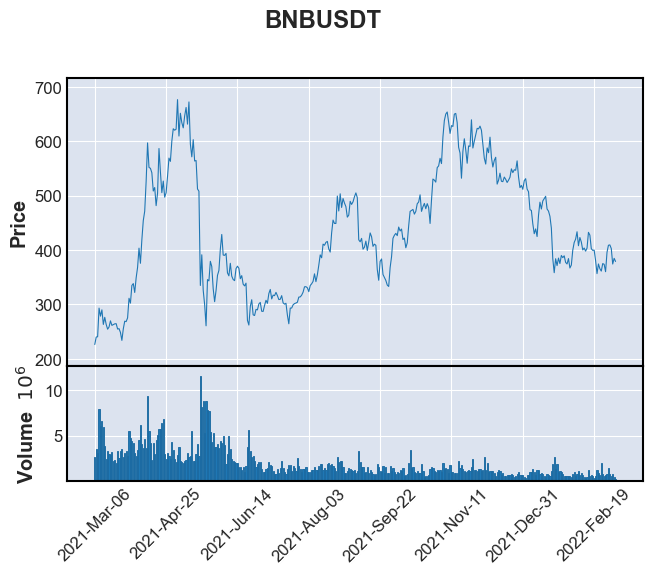

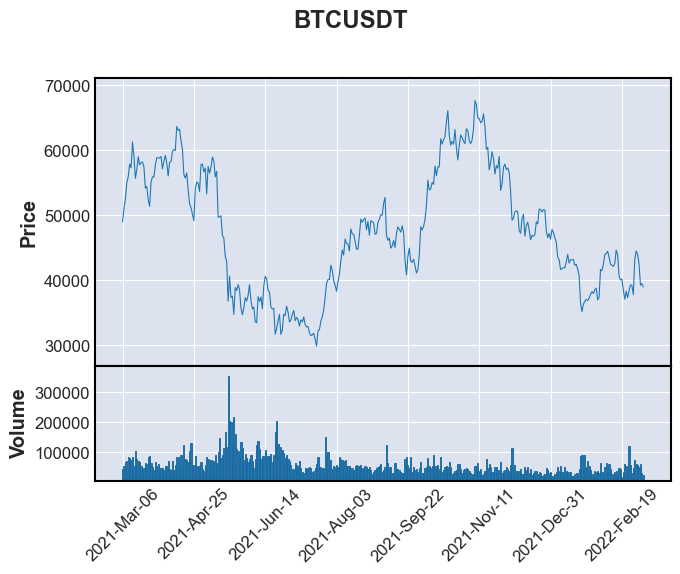

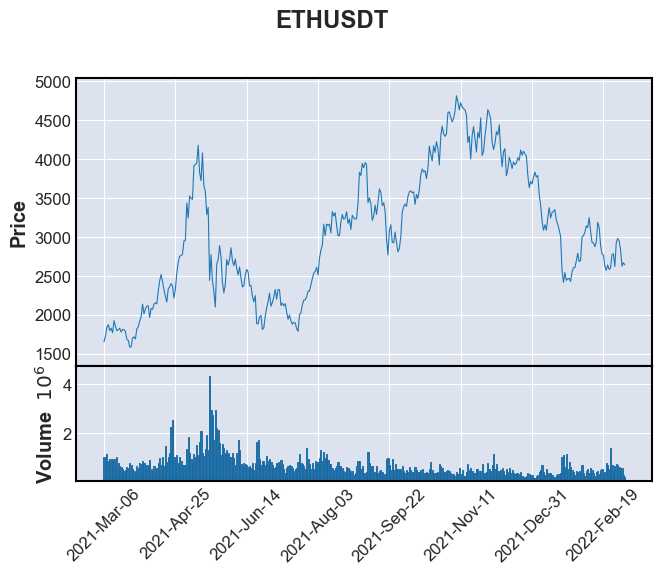

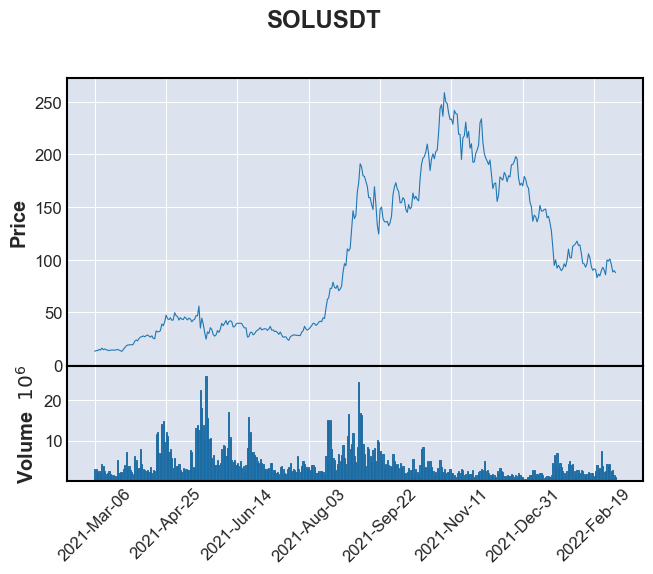

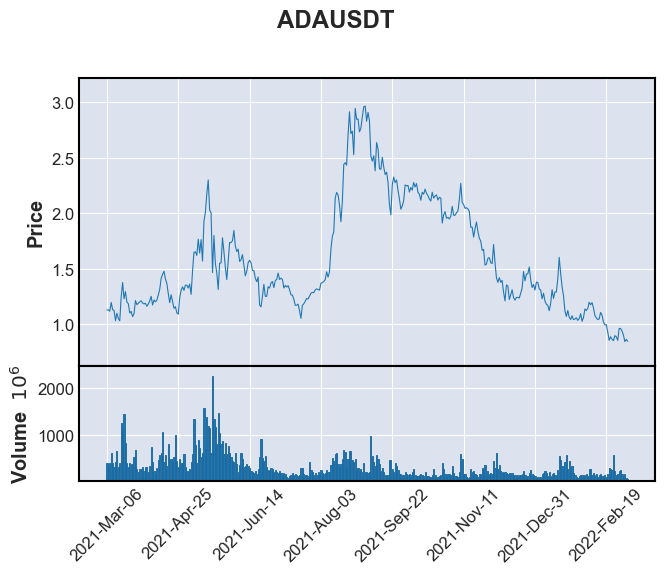

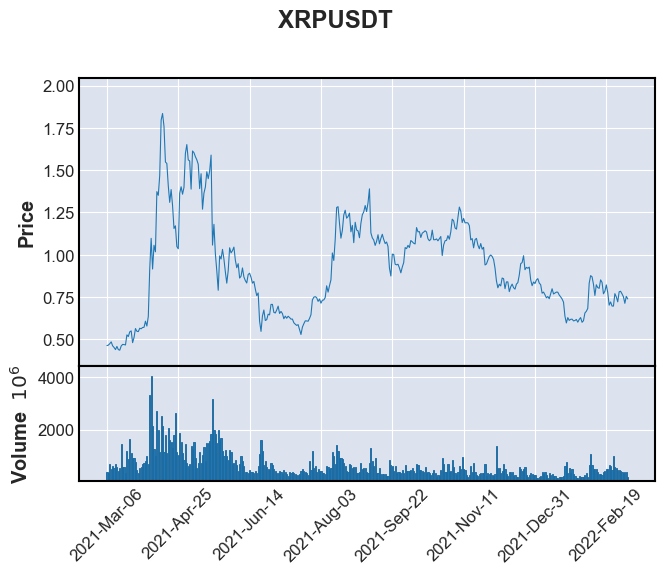

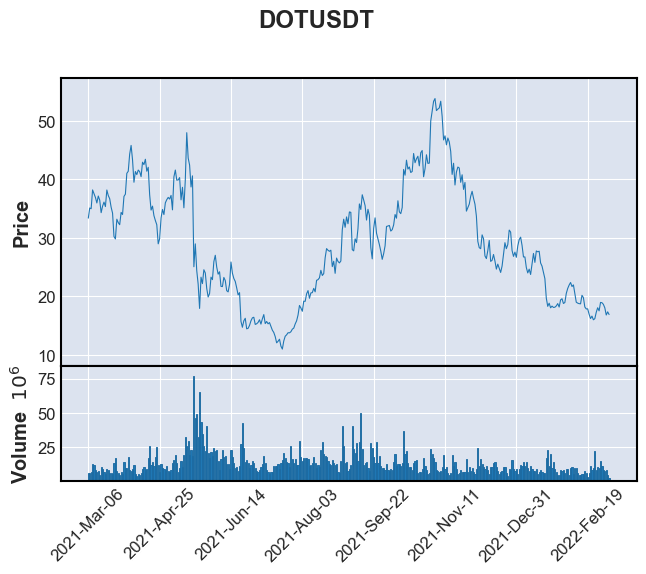

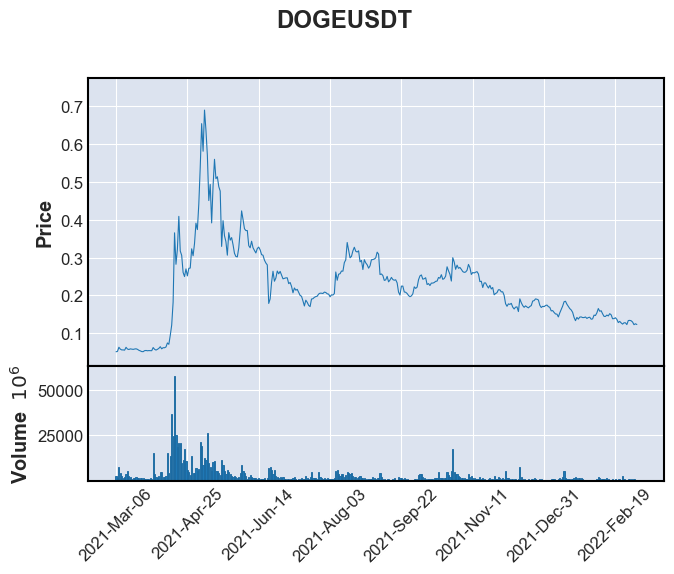

In [20]:
#Plot trends

for asset in assets:    
    #mpl.plot(df[df['asset'] == asset], type='candle', volume=True, mav=7,title=asset)
    mpl.plot(df[df['asset'] == asset], type='line', volume=True,title=asset)

In [21]:
#Calcular mu y sigma

mu = {}
retornos = []
retornos_x = []

for asset in assets:
    lista = np.array(df[df['asset'] == asset]['Close'])
    retornos = (lista[1:]/lista[:-1])-1
    mu[asset] = np.average(retornos)
    retornos_x.append(retornos)
    #retornos_x = retornos_x.append(retornos)
#x = np.vstack([retornos_x[0],retornos_x[1],retornos_x[2],retornos_x[3],retornos_x[4],retornos_x[5],retornos_x[6],retornos_x[7]])
x = np.vstack(retornos_x)
sigma = np.cov(x)

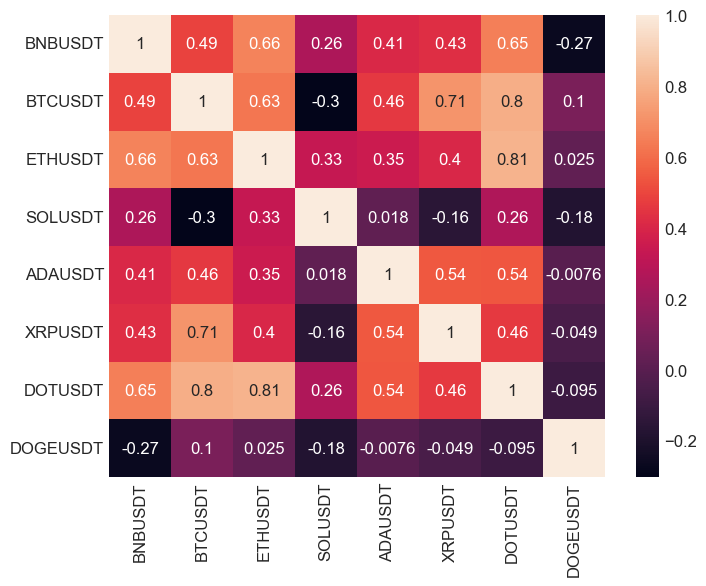

In [22]:
corr_df = pd.DataFrame(sigma).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True,xticklabels=assets, yticklabels=assets)
plt.show()

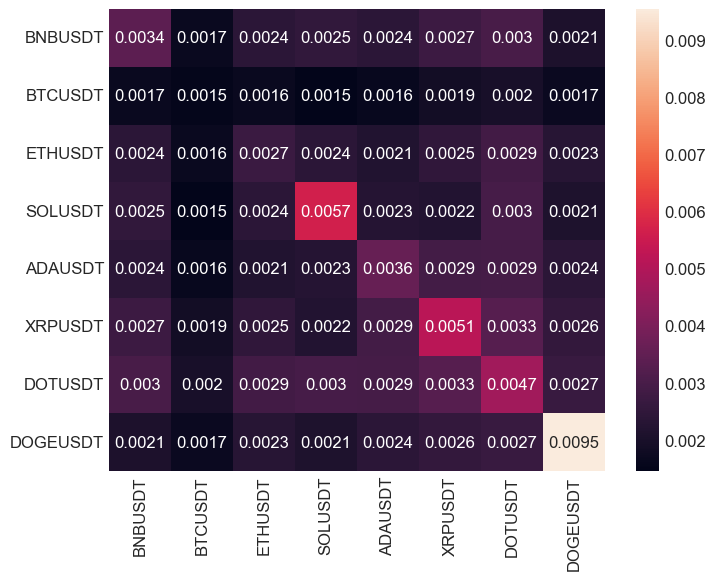

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(sigma, annot=True,xticklabels=assets, yticklabels=assets)
plt.show()

In [47]:
#Build QUBO function to optimize

num_assets = len(assets)     
q = 0.5                  
budget = round(len(assets)*0.2)       
seed = 19900330  

#portfolio = PortfolioOptimization(expected_returns=[item for item in mu.values()], covariances=sigma, risk_factor=q, budget=budget,bounds=[[0,2]]*len(assets))
portfolio = PortfolioOptimization(expected_returns=[item for item in mu.values()], covariances=sigma, risk_factor=q,budget=budget)

qp = portfolio.to_quadratic_program()

##############################
print(qp)

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Portfolio optimization

Minimize
 obj: - 0.003124708810 x_0 - 0.000134480362 x_1 - 0.002642736426 x_2
      - 0.008047770430 x_3 - 0.000975680417 x_4 - 0.003762424689 x_5
      - 0.000521501415 x_6 - 0.006537518416 x_7 + [ 0.003390764567 x_0^2
      + 0.003329909635 x_0*x_1 + 0.004786184303 x_0*x_2 + 0.004996732451 x_0*x_3
      + 0.004788644368 x_0*x_4 + 0.005448984828 x_0*x_5 + 0.005943247677 x_0*x_6
      + 0.004162929574 x_0*x_7 + 0.001525814498 x_1^2 + 0.003293555275 x_1*x_2
      + 0.002905553949 x_1*x_3 + 0.003227271620 x_1*x_4 + 0.003712556238 x_1*x_5
      + 0.003935411094 x_1*x_6 + 0.003356029859 x_1*x_7 + 0.002697160964 x_2^2
      + 0.004780976153 x_2*x_3 + 0.004299339913 x_2*x_4 + 0.004949056725 x_2*x_5
      + 0.005700206234 x_2*x_6 + 0.004599133417 x_2*x_7 + 0.005652359838 x_3^2
      + 0.004545507130 x_3*x_4 + 0.004392986653 x_3*x_5 + 0.005922503442 x_3*x_6
      + 0.004176608636 x_3*x_7 + 0.

## Algoritmo 1 - Programaci√≥n Lineal con Cplex (M√©todo Simplex) - Cl√°sico

In [39]:
%%time

###Classical Optimizer CPLEX###

algorithm_globals.random_seed = 1990
cplex_optimizer = CplexOptimizer()
cplex_result = cplex_optimizer.solve(qp)

print(cplex_result)

optimal function value: -0.004902175114339399
optimal value: [0. 0. 0. 1. 0. 0. 0. 1.]
status: SUCCESS
CPU times: user 18.8 ms, sys: 31.3 ms, total: 50.1 ms
Wall time: 64.8 ms


## Algoritmo 2 - Variational Quantum Eigensolver (VQE) - Hibrido C√∫antico y Cl√°sico
<center><img src="src/vqe.png" width="800" height="800"/></center>

In [54]:
%%time

###VQE###


num_qubits = len(assets) 
ansatz = EfficientSU2(num_qubits, reps=1, entanglement='linear', insert_barriers=True)

print(ansatz)

algorithm_globals.random_seed = 1990
backend = Aer.get_backend('qasm_simulator')
optimizer = SLSQP()  

vqe = VQE(ansatz = ansatz ,optimizer=optimizer, quantum_instance=backend)

vqe_meo = MinimumEigenOptimizer(vqe)
result = vqe_meo.solve(qp)

print(result)  

     ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê ‚ñë                                     ‚ñë ¬ª
q_0: ‚î§ Ry(Œ∏[0]) ‚îú‚îÄ‚î§ Rz(Œ∏[8]) ‚îú‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ¬ª
     ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ ‚ñë ‚îå‚îÄ‚î¥‚îÄ‚îê                               ‚ñë ¬ª
q_1: ‚î§ Ry(Œ∏[1]) ‚îú‚îÄ‚î§ Rz(Œ∏[9]) ‚îú‚îÄ‚ñë‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ¬ª
     ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îå‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ ‚ñë ‚îî‚îÄ‚îÄ‚îÄ‚îò‚îå‚îÄ‚î¥‚îÄ‚îê                          ‚ñë ¬ª
q_2: ‚î§ Ry(Œ∏[2]) ‚îú‚î§ Rz(Œ∏[10]) ‚îú‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ¬ª
     ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ ‚ñë      ‚îî‚îÄ‚îÄ‚

## Algoritmo 3 - Quantum Approximate Optimization Algorithm (QAOA) - Hibrido C√∫antico y Cl√°sico
<center><img src="src/qaoa.png" width="600" height="600"/></center>

In [57]:
%%time

##QAOA###

#algorithm_globals.massive=True
optimizer = COBYLA(|)  
#algorithm_globals.random_seed = 1990
backend = Aer.get_backend('qasm_simulator')

quantum_instance = QuantumInstance(backend=backend, seed_simulator=1234, seed_transpiler=1234)
qaoa = QAOA(optimizer=optimizer,quantum_instance=backend)

qaoa_meo = MinimumEigenOptimizer(qaoa)

result = qaoa_meo.solve(qp)

print(result) 

optimal function value: -0.004902175114339399
optimal value: [0. 0. 0. 1. 0. 0. 0. 1.]
status: SUCCESS
CPU times: user 2.29 s, sys: 15.3 ms, total: 2.31 s
Wall time: 2.32 s
